# Based on: [ "10 minutes to `pandas`"](https://pandas.pydata.org/docs/user_guide/10min.html)

In [1]:
import pandas as pd
import numpy as np

# 1. Object Creation

## 1.1 Creating a Series

#### Creating a `Series` from a list of values.

In [2]:
s = pd.Series([1, 2, 3, 'a', 'b', 'c', '', np.nan], name='stuff')
s

0      1
1      2
2      3
3      a
4      b
5      c
6       
7    NaN
Name: stuff, dtype: object

#### Creating a `Series` from a NumPy array:

In [4]:
an_array = np.array([2.55, -4.015, 8, np.nan, 128])
s = pd.Series(an_array, dtype='float32')
s

0      2.550
1     -4.015
2      8.000
3        NaN
4    128.000
dtype: float32

## 1.2 Creating a Dataframe

#### Creating a `DataFrame`  from a NumPy array:

In [4]:
# creating a datetime index
dates = pd.date_range('2020-01-01', periods=7)

# creating a NumPy array
data_array = np.random.randn(7, 4)

# creating the DataFrame
df = pd.DataFrame(data_array, index=dates, columns=list('ABCD'))
df

,A,B,C,D
2020-01-01,0.441126,0.893769,0.823945,1.237723
2020-01-02,0.906848,-1.035989,-0.392518,-2.110389
2020-01-03,-1.160175,-2.217824,0.265990,0.609165
2020-01-04,-0.769196,-0.015460,0.602220,0.207620
2020-01-05,-1.564706,-2.066804,0.267067,1.277810
2020-01-06,0.112219,-0.100825,1.390698,0.170804
2020-01-07,-1.212147,-1.487602,1.689310,0.332797


In [5]:
# a one-liner for the above
df = pd.DataFrame(np.random.randn(7, 4),
                   index=pd.date_range('2020-01-01', periods=7),
                   columns=list('ABCD')) 
df

,A,B,C,D
2020-01-01,-1.772627,-0.287776,-0.922714,-0.997659
2020-01-02,-1.777564,-1.260863,-0.520875,-0.130760
2020-01-03,0.128057,-1.743690,1.790680,-1.756261
2020-01-04,-0.708204,-2.277749,0.513217,1.115027
2020-01-05,-0.003871,0.662846,-1.089938,0.643729
2020-01-06,-1.321100,-0.131818,1.820233,-1.946099
2020-01-07,2.614259,0.461427,-0.075509,1.162532


#### Creating a `DataFrame` from a `dict`

In [6]:
df2 = pd.DataFrame({'A': 1.,
                    'B': pd.Timestamp('2020-01-02'),
                    'C': pd.Series(1, index=list(range(4)), dtype='float32'),
                    'D': np.array([3] * 4, dtype='int32'),
                    'E': pd.Categorical(["test", "train", "test", "train"]),
                    'F': 'foo'})

df2

,A,B,C,D,E,F
0,1.0,2020-01-02,1.0,3,test,foo
1,1.0,2020-01-02,1.0,3,train,foo
2,1.0,2020-01-02,1.0,3,test,foo
3,1.0,2020-01-02,1.0,3,train,foo


In [7]:
df2.dtypes  # checking data types 

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

# 2. Viewing Data

### 2.1 Viewing the top of the dataframe

In [8]:
df.head()

,A,B,C,D
2020-01-01,-1.772627,-0.287776,-0.922714,-0.997659
2020-01-02,-1.777564,-1.260863,-0.520875,-0.130760
2020-01-03,0.128057,-1.743690,1.790680,-1.756261
2020-01-04,-0.708204,-2.277749,0.513217,1.115027
2020-01-05,-0.003871,0.662846,-1.089938,0.643729


In [9]:
df.head(n=10)  # default n=5

,A,B,C,D
2020-01-01,-1.772627,-0.287776,-0.922714,-0.997659
2020-01-02,-1.777564,-1.260863,-0.520875,-0.130760
2020-01-03,0.128057,-1.743690,1.790680,-1.756261
2020-01-04,-0.708204,-2.277749,0.513217,1.115027
2020-01-05,-0.003871,0.662846,-1.089938,0.643729
2020-01-06,-1.321100,-0.131818,1.820233,-1.946099
2020-01-07,2.614259,0.461427,-0.075509,1.162532


### 2.2 Viewing the bottom of the dataframe

In [10]:
df.tail()

,A,B,C,D
2020-01-03,0.128057,-1.743690,1.790680,-1.756261
2020-01-04,-0.708204,-2.277749,0.513217,1.115027
2020-01-05,-0.003871,0.662846,-1.089938,0.643729
2020-01-06,-1.321100,-0.131818,1.820233,-1.946099
2020-01-07,2.614259,0.461427,-0.075509,1.162532


### 2.3 Viewing the index and columns

In [11]:
df.index

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07'],
              dtype='datetime64[ns]', freq='D')

In [12]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

### 2.4 To get a quick statistical summary

In [13]:
df.describe()

,A,B,C,D
count,7.000000,7.000000,7.000000,7.000000
mean,-0.405864,-0.653946,0.216442,-0.272784
std,1.540913,1.123782,1.209106,1.314816
min,-1.777564,-2.277749,-1.089938,-1.946099
25%,-1.546864,-1.502277,-0.721795,-1.376960
50%,-0.708204,-0.287776,-0.075509,-0.130760
75%,0.062093,0.164804,1.151949,0.879378
max,2.614259,0.662846,1.820233,1.162532


In [14]:
# for non-numeric columns
df2.describe(include=['object', 'category']) 

,E,F
count,4,4
unique,2,1
top,test,foo
freq,2,4


### 2.5 Transposing data

In [15]:
df.T

,2020-01-01,2020-01-02,2020-01-03,2020-01-04,2020-01-05,2020-01-06,2020-01-07
A,-1.772627,-1.777564,0.128057,-0.708204,-0.003871,-1.321100,2.614259
B,-0.287776,-1.260863,-1.743690,-2.277749,0.662846,-0.131818,0.461427
C,-0.922714,-0.520875,1.790680,0.513217,-1.089938,1.820233,-0.075509
D,-0.997659,-0.130760,-1.756261,1.115027,0.643729,-1.946099,1.162532


### 2.6 Sorting by axis

In [16]:
# sorting the columns (by label) in descending order
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2020-01-01,-0.997659,-0.922714,-0.287776,-1.772627
2020-01-02,-0.130760,-0.520875,-1.260863,-1.777564
2020-01-03,-1.756261,1.790680,-1.743690,0.128057
2020-01-04,1.115027,0.513217,-2.277749,-0.708204
2020-01-05,0.643729,-1.089938,0.662846,-0.003871
2020-01-06,-1.946099,1.820233,-0.131818,-1.321100
2020-01-07,1.162532,-0.075509,0.461427,2.614259


In [17]:
# sorting the rows (by index) in descending order
df.sort_index(axis=0, ascending=False)

,A,B,C,D
2020-01-07,2.614259,0.461427,-0.075509,1.162532
2020-01-06,-1.321100,-0.131818,1.820233,-1.946099
2020-01-05,-0.003871,0.662846,-1.089938,0.643729
2020-01-04,-0.708204,-2.277749,0.513217,1.115027
2020-01-03,0.128057,-1.743690,1.790680,-1.756261
2020-01-02,-1.777564,-1.260863,-0.520875,-0.130760
2020-01-01,-1.772627,-0.287776,-0.922714,-0.997659


### 2.7 Sorting by values

In [18]:
# sorting rows in ascending order by values in colums B
df.sort_values(by='B')  # the default order is ascending=True

,A,B,C,D
2020-01-04,-0.708204,-2.277749,0.513217,1.115027
2020-01-03,0.128057,-1.743690,1.790680,-1.756261
2020-01-02,-1.777564,-1.260863,-0.520875,-0.130760
2020-01-01,-1.772627,-0.287776,-0.922714,-0.997659
2020-01-06,-1.321100,-0.131818,1.820233,-1.946099
2020-01-07,2.614259,0.461427,-0.075509,1.162532
2020-01-05,-0.003871,0.662846,-1.089938,0.643729


In [19]:
# sorting rows in descending order by values in colums C
df.sort_values(by='C', ascending=False)

,A,B,C,D
2020-01-06,-1.321100,-0.131818,1.820233,-1.946099
2020-01-03,0.128057,-1.743690,1.790680,-1.756261
2020-01-04,-0.708204,-2.277749,0.513217,1.115027
2020-01-07,2.614259,0.461427,-0.075509,1.162532
2020-01-02,-1.777564,-1.260863,-0.520875,-0.130760
2020-01-01,-1.772627,-0.287776,-0.922714,-0.997659
2020-01-05,-0.003871,0.662846,-1.089938,0.643729


# 3. Selection

### 3.1 Selecting a single column, which yields a `Series`

In [20]:
df.A

2020-01-01   -1.772627
2020-01-02   -1.777564
2020-01-03    0.128057
2020-01-04   -0.708204
2020-01-05   -0.003871
2020-01-06   -1.321100
2020-01-07    2.614259
Freq: D, Name: A, dtype: float64

In [21]:
df['A']

2020-01-01   -1.772627
2020-01-02   -1.777564
2020-01-03    0.128057
2020-01-04   -0.708204
2020-01-05   -0.003871
2020-01-06   -1.321100
2020-01-07    2.614259
Freq: D, Name: A, dtype: float64

### 3.2 Selecting slices of rows

In [22]:
df['2020-01-02':'2020-01-04']

,A,B,C,D
2020-01-02,-1.777564,-1.260863,-0.520875,-0.130760
2020-01-03,0.128057,-1.743690,1.790680,-1.756261
2020-01-04,-0.708204,-2.277749,0.513217,1.115027


### 3.3 Selection by label

In [23]:
# selecting the first row
df.loc['2020-01-01']

A   -1.772627
B   -0.287776
C   -0.922714
D   -0.997659
Name: 2020-01-01 00:00:00, dtype: float64

In [24]:
# selecting values from columns 'A' and 'C'
df.loc[:, ['A', 'C']]

,A,C
2020-01-01,-1.772627,-0.922714
2020-01-02,-1.777564,-0.520875
2020-01-03,0.128057,1.790680
2020-01-04,-0.708204,0.513217
2020-01-05,-0.003871,-1.089938
2020-01-06,-1.321100,1.820233
2020-01-07,2.614259,-0.075509


In [25]:
# multi-axis label selection
df.loc['2020-01-02':'2020-01-05', ['B', 'D']]

,B,D
2020-01-02,-1.260863,-0.130760
2020-01-03,-1.743690,-1.756261
2020-01-04,-2.277749,1.115027
2020-01-05,0.662846,0.643729


### 3.4 Reduction in dimension of the returned object

In [26]:
df.loc['2020-01-02', ['A', 'B']]

A   -1.777564
B   -1.260863
Name: 2020-01-02 00:00:00, dtype: float64

### 3.5 Getting fast access to a scalar value

In [27]:
 df.at['2020-01-04', 'A'] # label based

-0.7082042402007672

In [28]:
df.iat[3, 0] # position based

-0.7082042402007672

### 3.6 Selection by position

In [29]:
df.iloc[4]

A   -0.003871
B    0.662846
C   -1.089938
D    0.643729
Name: 2020-01-05 00:00:00, dtype: float64

In [30]:
df.iloc[3:5, 2:4]

,C,D
2020-01-04,0.513217,1.115027
2020-01-05,-1.089938,0.643729


In [31]:
df.iloc[[1, 2, 4], [0, 2]]

,A,C
2020-01-02,-1.777564,-0.520875
2020-01-03,0.128057,1.790680
2020-01-05,-0.003871,-1.089938


### 3.7 Boolean indexing

In [32]:
# selecting rows for which values in column 'B' are greater than zero
df[df['B'] > 0]

,A,B,C,D
2020-01-05,-0.003871,0.662846,-1.089938,0.643729
2020-01-07,2.614259,0.461427,-0.075509,1.162532


### 3.8 Using the `isin()` method for filtering

In [33]:
df2 = df.copy()
df2['E'] = ['one', 'one', 'two', 'three', 'four', 'three','seven']
df2

,A,B,C,D,E
2020-01-01,-1.772627,-0.287776,-0.922714,-0.997659,one
2020-01-02,-1.777564,-1.260863,-0.520875,-0.130760,one
2020-01-03,0.128057,-1.743690,1.790680,-1.756261,two
2020-01-04,-0.708204,-2.277749,0.513217,1.115027,three
2020-01-05,-0.003871,0.662846,-1.089938,0.643729,four
2020-01-06,-1.321100,-0.131818,1.820233,-1.946099,three
2020-01-07,2.614259,0.461427,-0.075509,1.162532,seven


In [34]:
df2[df2['E'].isin(['two', 'four'])]

,A,B,C,D,E
2020-01-03,0.128057,-1.743690,1.790680,-1.756261,two
2020-01-05,-0.003871,0.662846,-1.089938,0.643729,four


# 4. Setting

In [35]:
s1 = pd.Series(range(1, 8), index=pd.date_range('2020-01-02', periods=7))

# setting s1 as column 'F' in the dataframe
df['F'] = s1
df

,A,B,C,D,F
2020-01-01,-1.772627,-0.287776,-0.922714,-0.997659,NaN
2020-01-02,-1.777564,-1.260863,-0.520875,-0.130760,1.0
2020-01-03,0.128057,-1.743690,1.790680,-1.756261,2.0
2020-01-04,-0.708204,-2.277749,0.513217,1.115027,3.0
2020-01-05,-0.003871,0.662846,-1.089938,0.643729,4.0
2020-01-06,-1.321100,-0.131818,1.820233,-1.946099,5.0
2020-01-07,2.614259,0.461427,-0.075509,1.162532,6.0


### 4.1 Setting values by label

In [36]:
df.at['2020-01-03', 'C'] = 0
df

,A,B,C,D,F
2020-01-01,-1.772627,-0.287776,-0.922714,-0.997659,NaN
2020-01-02,-1.777564,-1.260863,-0.520875,-0.130760,1.0
2020-01-03,0.128057,-1.743690,0.000000,-1.756261,2.0
2020-01-04,-0.708204,-2.277749,0.513217,1.115027,3.0
2020-01-05,-0.003871,0.662846,-1.089938,0.643729,4.0
2020-01-06,-1.321100,-0.131818,1.820233,-1.946099,5.0
2020-01-07,2.614259,0.461427,-0.075509,1.162532,6.0


### 4.2 Setting values by position

In [37]:
df.iat[0, 1] = 0
df

,A,B,C,D,F
2020-01-01,-1.772627,0.000000,-0.922714,-0.997659,NaN
2020-01-02,-1.777564,-1.260863,-0.520875,-0.130760,1.0
2020-01-03,0.128057,-1.743690,0.000000,-1.756261,2.0
2020-01-04,-0.708204,-2.277749,0.513217,1.115027,3.0
2020-01-05,-0.003871,0.662846,-1.089938,0.643729,4.0
2020-01-06,-1.321100,-0.131818,1.820233,-1.946099,5.0
2020-01-07,2.614259,0.461427,-0.075509,1.162532,6.0


### 4.3 Setting by assigning with a NumPy array

In [38]:
df.loc[:, 'D'] = np.array([7] * len(df))
df

,A,B,C,D,F
2020-01-01,-1.772627,0.000000,-0.922714,7,NaN
2020-01-02,-1.777564,-1.260863,-0.520875,7,1.0
2020-01-03,0.128057,-1.743690,0.000000,7,2.0
2020-01-04,-0.708204,-2.277749,0.513217,7,3.0
2020-01-05,-0.003871,0.662846,-1.089938,7,4.0
2020-01-06,-1.321100,-0.131818,1.820233,7,5.0
2020-01-07,2.614259,0.461427,-0.075509,7,6.0


### 4.4 A `where` operation with setting

In [39]:
df2 = df.copy()
df2[df2 < 0] = "-ve"
df2

,A,B,C,D,F
2020-01-01,-ve,0.0,-ve,7,NaN
2020-01-02,-ve,-ve,-ve,7,1.0
2020-01-03,0.128057,-ve,0.0,7,2.0
2020-01-04,-ve,-ve,0.513217,7,3.0
2020-01-05,-ve,0.662846,-ve,7,4.0
2020-01-06,-ve,-ve,1.820233,7,5.0
2020-01-07,2.614259,0.461427,-ve,7,6.0


# 5. Missing Data

In [40]:
# Adding some NaN values (the default representation for missing data)
df.iloc[4, 2:4] = np.nan
df.at['2020-01-05','A'] = np.nan
df

,A,B,C,D,F
2020-01-01,-1.772627,0.000000,-0.922714,7.0,NaN
2020-01-02,-1.777564,-1.260863,-0.520875,7.0,1.0
2020-01-03,0.128057,-1.743690,0.000000,7.0,2.0
2020-01-04,-0.708204,-2.277749,0.513217,7.0,3.0
2020-01-05,NaN,0.662846,NaN,NaN,4.0
2020-01-06,-1.321100,-0.131818,1.820233,7.0,5.0
2020-01-07,2.614259,0.461427,-0.075509,7.0,6.0


### 5.1 Dropping rows with missing data

In [41]:
df.dropna()  # returns a copy with rows having NaN values eliminated
# df.dropna(inplace=True)   # modifies df

,A,B,C,D,F
2020-01-02,-1.777564,-1.260863,-0.520875,7.0,1.0
2020-01-03,0.128057,-1.743690,0.000000,7.0,2.0
2020-01-04,-0.708204,-2.277749,0.513217,7.0,3.0
2020-01-06,-1.321100,-0.131818,1.820233,7.0,5.0
2020-01-07,2.614259,0.461427,-0.075509,7.0,6.0


### 5.2 Filling missing values

In [42]:
df.fillna(value=0.11111) # returns a copy with NaN values substituted with 0.11111

,A,B,C,D,F
2020-01-01,-1.772627,0.000000,-0.922714,7.00000,0.11111
2020-01-02,-1.777564,-1.260863,-0.520875,7.00000,1.00000
2020-01-03,0.128057,-1.743690,0.000000,7.00000,2.00000
2020-01-04,-0.708204,-2.277749,0.513217,7.00000,3.00000
2020-01-05,0.111110,0.662846,0.111110,0.11111,4.00000
2020-01-06,-1.321100,-0.131818,1.820233,7.00000,5.00000
2020-01-07,2.614259,0.461427,-0.075509,7.00000,6.00000


### 5.3 To get the boolean mask where values are `nan`:

In [43]:
pd.isna(df)

,A,B,C,D,F
2020-01-01,False,False,False,False,True
2020-01-02,False,False,False,False,False
2020-01-03,False,False,False,False,False
2020-01-04,False,False,False,False,False
2020-01-05,True,False,True,True,False
2020-01-06,False,False,False,False,False
2020-01-07,False,False,False,False,False


# 6. Operations

In [44]:
df.mean() # gives the mean for each column

A   -0.472863
B   -0.612835
C    0.135725
D    7.000000
F    3.500000
dtype: float64

In [45]:
df.mean(axis=1) # calculates the mean for each row 

2020-01-01    1.076165
2020-01-02    0.888140
2020-01-03    1.476873
2020-01-04    1.505453
2020-01-05    2.331423
2020-01-06    2.473463
2020-01-07    3.200035
Freq: D, dtype: float64

### 6.1 Applying functions to the dataframe

In [46]:
df.fillna(0).apply(np.ptp)  # quickly getting the range per column

A    4.391823
B    2.940594
C    2.742947
D    7.000000
F    6.000000
dtype: float64

In [47]:
df.apply(lambda x: x**3 + 1 )

,A,B,C,D,F
2020-01-01,-4.569962,1.000000,0.214399,344.0,NaN
2020-01-02,-4.616629,-1.004489,0.858681,344.0,2.0
2020-01-03,1.002100,-4.301615,1.000000,344.0,9.0
2020-01-04,0.644798,-10.817280,1.135177,344.0,28.0
2020-01-05,NaN,1.291231,NaN,NaN,65.0
2020-01-06,-1.305724,0.997710,7.030880,344.0,126.0
2020-01-07,18.866760,1.098245,0.999569,344.0,217.0


### 6.2 Histogramming

In [48]:
s = pd.Series(list('abcdababddknkz'))
s.value_counts()

a    3
d    3
b    3
k    2
n    1
z    1
c    1
dtype: int64

### 6.3 String methods

In [49]:
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

In [50]:
s.str.title()

0       A
1       B
2       C
3    Aaba
4    Baca
5     NaN
6    Caba
7     Dog
8     Cat
dtype: object

# 7. Merge

### 7.1 Concat

In [51]:
df = pd.DataFrame(np.random.randn(8, 4), columns=['1st','2nd','3rd','4th'])
df

,1st,2nd,3rd,4th
0,0.103834,-1.488149,-0.799436,-0.191476
1,-0.807219,0.251320,-0.275903,-0.452120
2,0.480434,2.172496,1.107183,-1.455163
3,-1.037377,-1.363103,1.432962,0.036728
4,1.041665,-0.009479,-1.612780,1.136819
5,0.308240,0.466319,-0.900541,-0.604220
6,0.606666,0.984111,0.200419,0.220297
7,1.540205,-1.538864,0.035534,0.150068


In [52]:
# getting 3 chunks of the dataframe
df1, df2, df3 = [df[:3], df[3:7], df[7:]]

print(df1,df2,df3, sep='\n\n')

        1st       2nd       3rd       4th
0  0.103834 -1.488149 -0.799436 -0.191476
1 -0.807219  0.251320 -0.275903 -0.452120
2  0.480434  2.172496  1.107183 -1.455163

        1st       2nd       3rd       4th
3 -1.037377 -1.363103  1.432962  0.036728
4  1.041665 -0.009479 -1.612780  1.136819
5  0.308240  0.466319 -0.900541 -0.604220
6  0.606666  0.984111  0.200419  0.220297

        1st       2nd       3rd       4th
7  1.540205 -1.538864  0.035534  0.150068


In [53]:
# concatinating the 3 chunks 
df4 = pd.concat([df3, df2, df1])
df4

,1st,2nd,3rd,4th
7,1.540205,-1.538864,0.035534,0.150068
3,-1.037377,-1.363103,1.432962,0.036728
4,1.041665,-0.009479,-1.612780,1.136819
5,0.308240,0.466319,-0.900541,-0.604220
6,0.606666,0.984111,0.200419,0.220297
0,0.103834,-1.488149,-0.799436,-0.191476
1,-0.807219,0.251320,-0.275903,-0.452120
2,0.480434,2.172496,1.107183,-1.455163


### 7.2 Join
SQL - style merges

In [54]:
left = pd.DataFrame({'key': ['foo', 'foo', 'bar'], 'lval': [1, 2, 3]})
left

,key,lval
0,foo,1
1,foo,2
2,bar,3


In [55]:
right = pd.DataFrame({'key': ['foo', 'bar', 'foo'], 'rval': [4, 5, 6]})
right

,key,rval
0,foo,4
1,bar,5
2,foo,6


In [56]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,foo,1,6
2,foo,2,4
3,foo,2,6
4,bar,3,5


# 8. Grouping

In this context, "group by” refers to a process involving one or more of the following steps:

- **Splitting** the data into groups based on some criteria

- **Applying** a function to each group independently

- **Combining** the results into a data structure

In [57]:
df = pd.DataFrame({'A': ['foo', 'bar', 'foo', 'bar', 'foo', 'bar'],
                   'B': ['one', 'one', 'two', 'three', 'two', 'two'],
                   'C': np.random.randn(6),
                   'D': np.random.randn(6)})
df

,A,B,C,D
0,foo,one,0.362194,1.940129
1,bar,one,1.010417,-0.357832
2,foo,two,0.571293,-1.244282
3,bar,three,-0.041219,0.535605
4,foo,two,-0.426046,0.480382
5,bar,two,0.679551,0.413882


In [58]:
 df.groupby('B').sum()

,C,D
B,,
one,1.372611,1.582297
three,-0.041219,0.535605
two,0.824798,-0.350018


In [59]:
df.groupby(['A', 'B']).sum()

C         D
A   B                        
bar one    1.010417 -0.357832
    three -0.041219  0.535605
    two    0.679551  0.413882
foo one    0.362194  1.940129
    two    0.145247 -0.763899

# 9. Reshaping

### 9.1 Stack

The `stack()` method “compresses” a level in the DataFrame’s columns.

In [60]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux'],
                    ['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two']]))
    
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])

df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])
df

A         B
first second                    
bar   one     0.745431  2.104233
      two     2.037717 -1.365649
baz   one    -1.285581 -0.438980
      two     1.337139 -1.085520
foo   one     1.376234  0.837635
      two     0.436956  1.241401
qux   one     1.320843 -0.548869
      two     1.282442  1.825328

In [61]:
stacked = df.stack()
stacked

first  second   
bar    one     A    0.745431
               B    2.104233
       two     A    2.037717
               B   -1.365649
baz    one     A   -1.285581
               B   -0.438980
       two     A    1.337139
               B   -1.085520
foo    one     A    1.376234
               B    0.837635
       two     A    0.436956
               B    1.241401
qux    one     A    1.320843
               B   -0.548869
       two     A    1.282442
               B    1.825328
dtype: float64

>With a “stacked” DataFrame or Series (having a MultiIndex as the index), the inverse operation of `stack()` is **`unstack()`**, which by default unstacks the last level:

In [62]:
stacked.unstack(level=0)  # unstacking the 1st level of the MultiIndex

first          bar       baz       foo       qux
second                                          
one    A  0.745431 -1.285581  1.376234  1.320843
       B  2.104233 -0.438980  0.837635 -0.548869
two    A  2.037717  1.337139  0.436956  1.282442
       B -1.365649 -1.085520  1.241401  1.825328

In [63]:
stacked.unstack(level=1)  # unstacking the 2nd level of the MultiIndex

second        one       two
first                      
bar   A  0.745431  2.037717
      B  2.104233 -1.365649
baz   A -1.285581  1.337139
      B -0.438980 -1.085520
foo   A  1.376234  0.436956
      B  0.837635  1.241401
qux   A  1.320843  1.282442
      B -0.548869  1.825328

In [64]:
stacked.unstack(1).unstack(0)

second       one                                     two                      \
first        bar       baz       foo       qux       bar       baz       foo   
A       0.745431 -1.285581  1.376234  1.320843  2.037717  1.337139  0.436956   
B       2.104233 -0.438980  0.837635 -0.548869 -1.365649 -1.085520  1.241401   

second            
first        qux  
A       1.282442  
B       1.825328

### 9.2 Pivot tables

In [65]:
df = pd.DataFrame({'A': ['one', 'one', 'two', 'three'] * 3,
                   'B': ['A', 'B', 'C'] * 4,
                   'C': ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                   'D': np.random.randn(12),
                   'E': np.random.randn(12)})
df

,A,B,C,D,E
0,one,A,foo,-2.349515,-2.409463
1,one,B,foo,-0.322959,0.214643
2,two,C,foo,0.016483,-0.263249
3,three,A,bar,1.997151,-1.781676
4,one,B,bar,-0.160371,-0.595254
5,one,C,bar,-0.996216,1.760218
6,two,A,foo,1.360996,-1.512248
7,three,B,foo,-0.057250,0.197716
8,one,C,foo,-2.078001,-1.570958
9,one,A,bar,0.081905,0.075810


In [66]:
pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])

C             bar       foo
A     B                    
one   A  0.081905 -2.349515
      B -0.160371 -0.322959
      C -0.996216 -2.078001
three A  1.997151       NaN
      B       NaN -0.057250
      C  0.420676       NaN
two   A       NaN  1.360996
      B -0.000925       NaN
      C       NaN  0.016483

# 10. Time Series

`pandas` has simple, powerful, and efficient functionality for performing resampling operations during frequency conversion (e.g., converting secondly data into minutely data)

In [67]:
rng = pd.date_range('1/1/2020', periods=24, freq='M')
rng

DatetimeIndex(['2020-01-31', '2020-02-29', '2020-03-31', '2020-04-30',
               '2020-05-31', '2020-06-30', '2020-07-31', '2020-08-31',
               '2020-09-30', '2020-10-31', '2020-11-30', '2020-12-31',
               '2021-01-31', '2021-02-28', '2021-03-31', '2021-04-30',
               '2021-05-31', '2021-06-30', '2021-07-31', '2021-08-31',
               '2021-09-30', '2021-10-31', '2021-11-30', '2021-12-31'],
              dtype='datetime64[ns]', freq='M')

In [68]:
ts = pd.Series(np.random.randint(0, 24, len(rng)), index=rng, name='monthly-foo')
ts.head()

2020-01-31    20
2020-02-29    17
2020-03-31    22
2020-04-30    23
2020-05-31     5
Freq: M, Name: monthly-foo, dtype: int64

In [69]:
ts.resample('3M').sum()  # gets totals for every quarter( 3 months)

2020-01-31    20
2020-04-30    62
2020-07-31    12
2020-10-31    27
2021-01-31    25
2021-04-30    14
2021-07-31    51
2021-10-31    41
2022-01-31    25
Freq: 3M, Name: monthly-foo, dtype: int64

### 10.1 Time zone representation

In [70]:
ts_utc = ts.tz_localize('CET')
ts_utc.head()

2020-01-31 00:00:00+01:00    20
2020-02-29 00:00:00+01:00    17
2020-03-31 00:00:00+02:00    22
2020-04-30 00:00:00+02:00    23
2020-05-31 00:00:00+02:00     5
Name: monthly-foo, dtype: int64

### 10.2 Converting to another time zone:

In [71]:
ts_utc.tz_convert('US/Eastern').head()

2020-01-30 18:00:00-05:00    20
2020-02-28 18:00:00-05:00    17
2020-03-30 18:00:00-04:00    22
2020-04-29 18:00:00-04:00    23
2020-05-30 18:00:00-04:00     5
Name: monthly-foo, dtype: int64

### 10.3 Converting between time span representations:

In [72]:
ps = ts.to_period()
ps.head()

2020-01    20
2020-02    17
2020-03    22
2020-04    23
2020-05     5
Freq: M, Name: monthly-foo, dtype: int64

In [73]:
ps.index

PeriodIndex(['2020-01', '2020-02', '2020-03', '2020-04', '2020-05', '2020-06',
             '2020-07', '2020-08', '2020-09', '2020-10', '2020-11', '2020-12',
             '2021-01', '2021-02', '2021-03', '2021-04', '2021-05', '2021-06',
             '2021-07', '2021-08', '2021-09', '2021-10', '2021-11', '2021-12'],
            dtype='period[M]', freq='M')

In [74]:
ps.to_timestamp().index

DatetimeIndex(['2020-01-01', '2020-02-01', '2020-03-01', '2020-04-01',
               '2020-05-01', '2020-06-01', '2020-07-01', '2020-08-01',
               '2020-09-01', '2020-10-01', '2020-11-01', '2020-12-01',
               '2021-01-01', '2021-02-01', '2021-03-01', '2021-04-01',
               '2021-05-01', '2021-06-01', '2021-07-01', '2021-08-01',
               '2021-09-01', '2021-10-01', '2021-11-01', '2021-12-01'],
              dtype='datetime64[ns]', freq='MS')

# 11. Categoricals

In [75]:
df = pd.DataFrame({"id": [1, 2, 3, 4, 5, 6],
                   "raw_grade": ['a', 'b', 'b', 'a', 'a', 'e']})
df

,id,raw_grade
0,1,a
1,2,b
2,3,b
3,4,a
4,5,a
5,6,e


In [76]:
df["grade"] = df["raw_grade"].astype("category")
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): ['a', 'b', 'e']

In [77]:
# Rename the categories to more meaningful names
df["grade"].cat.categories = ["very good", "good", "very bad"]
df

,id,raw_grade,grade
0,1,a,very good
1,2,b,good
2,3,b,good
3,4,a,very good
4,5,a,very good
5,6,e,very bad


# 12. Plotting

<AxesSubplot:>

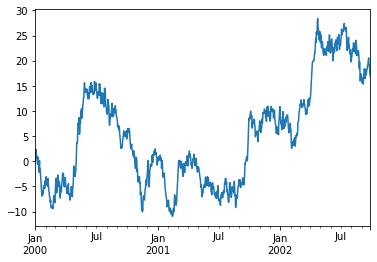

In [78]:
ts = pd.Series(np.random.randn(1000),
               index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
ts.plot()

<AxesSubplot:>

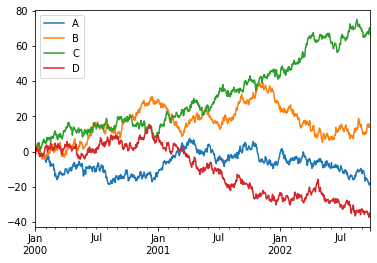

In [79]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,
                  columns=['A', 'B', 'C', 'D'])

df = df.cumsum()

df.plot()

# 13. Importing / Exporting Data

### CSV

In [84]:
# Writing to a csv file
df.to_csv('data/data.csv')

In [81]:
# Reading from a csv file
pd.read_csv('data/data.csv', index_col=0).head()

,A,B,C,D
2000-01-01,-1.662334,1.754375,2.277854,-1.222050
2000-01-02,-3.170328,2.640600,3.252950,0.325672
2000-01-03,-4.905516,3.187861,1.720954,-1.209723
2000-01-04,-5.109194,3.717737,2.365512,0.338022
2000-01-05,-5.705884,2.990343,1.962035,0.355969


### Excel

In [82]:
# Writing to an excel file
df.to_excel('data/data.xlsx', sheet_name='Sheet1')

In [83]:
# Reading from an excel file
pd.read_excel('data/data.xlsx', index_col=0).head()

,A,B,C,D
2000-01-01,0.407155,-0.635909,-0.280195,-0.192166
2000-01-02,0.252403,1.713797,-0.053877,-1.719508
2000-01-03,1.996080,2.316905,0.508262,0.652518
2000-01-04,0.857419,1.820726,0.295162,2.534572
2000-01-05,0.687044,2.073538,0.185425,2.446147


### HDF5

In [85]:
# Writing to a HDF5 Store
df.to_hdf('data/data.hdf', 'df')

In [86]:
# Reading from a HDF5 Store 
pd.read_hdf('data/data.hdf', 'df').head()

,A,B,C,D
2000-01-01,0.407155,-0.635909,-0.280195,-0.192166
2000-01-02,0.252403,1.713797,-0.053877,-1.719508
2000-01-03,1.996080,2.316905,0.508262,0.652518
2000-01-04,0.857419,1.820726,0.295162,2.534572
2000-01-05,0.687044,2.073538,0.185425,2.446147
